**Topic:** Fractal Dimension Analysis for compelexity of Signals

**Dataset Link:** [Click here](https://drive.google.com/file/d/1frLdti9G02C6pCF6KeBg-s9kMPHEpabP/view?usp=drivesdk)

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data=pd.read_csv("dataset.csv", parse_dates=['Time'])
print(data.head(6),"\n\n", data.tail(6))

                     Time       Signal1   Signal2 Label
0 2017-08-14 11:37:49.791  33668.091913  0.856726     A
1 2017-08-14 11:37:49.801  32564.903040  0.856705     A
2 2017-08-14 11:37:49.811  31454.043305  0.856683     A
3 2017-08-14 11:37:49.821  30335.387166  0.856659     A
4 2017-08-14 11:37:49.831  29207.142938  0.856634     A
5 2017-08-14 11:37:49.841  28066.378446  0.856607     A 

                           Time       Signal1   Signal2 Label
911994 2020-01-04 10:55:49.176  34674.522012  0.151402     C
911995 2020-01-04 10:55:49.186  34673.811155  0.151395     C
911996 2020-01-04 10:55:49.196  34672.951723  0.151385     C
911997 2020-01-04 10:55:49.206  34671.967555  0.151373     C
911998 2020-01-04 10:55:49.216  34670.877944  0.151359     C
911999 2020-01-04 10:55:49.226  34669.694865  0.151342     C


In [10]:
print(data.info(), "\n\n", data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912000 entries, 0 to 911999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Time     912000 non-null  datetime64[ns]
 1   Signal1  912000 non-null  float64       
 2   Signal2  912000 non-null  float64       
 3   Label    912000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 27.8+ MB
None 

                                 Time        Signal1        Signal2
count                         912000  912000.000000  912000.000000
mean   2017-11-29 07:30:37.164028416   31315.380483       0.398004
min       2017-08-12 11:08:25.785000   -2934.328327       0.113841
25%    2017-08-14 11:43:49.788499968   23851.958837       0.162522
50%    2017-09-19 12:04:44.193000192   30650.812455       0.261210
75%    2017-09-26 12:33:48.406500096   37933.966586       0.546605
max       2020-01-04 10:55:49.226000   67692.652022       1.35601

We observe that Signal 1 is more dispersed than Signal 2 due to more standard deviation in case of signal 1. There may be more outliers in Signal 1


---









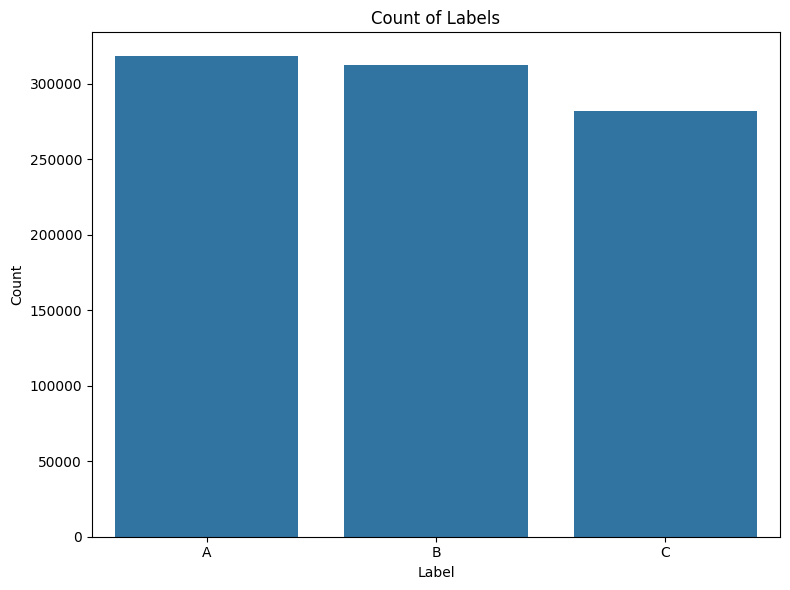

In [12]:

# Calculate counts of each category
label_counts = data['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']  # Rename columns to avoid confusion

# Plotting the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Label', y='Count', data=label_counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Labels')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for clarity
plt.tight_layout()
plt.show()


The number of data elements(rows) associated with each class is almost same.

Text(0.5, 1.0, 'signal2 average by class')

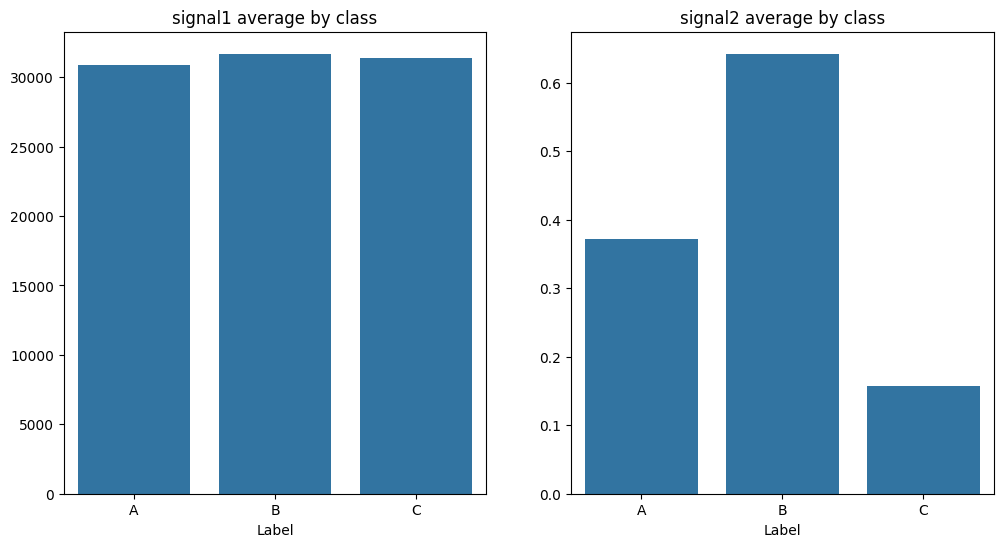

In [13]:
avg_sig1=data.groupby('Label')['Signal1'].mean()
avg_sig2=data.groupby('Label')['Signal2'].mean()
fig, axes = plt.subplots(nrows=1 ,ncols= 2,  figsize=(12, 6))

sns.barplot(ax=axes[0], x=avg_sig1.index, y=avg_sig1.values)
axes[0].set_title('signal1 average by class')

sns.barplot(ax=axes[1], x=avg_sig2.index, y=avg_sig2.values)
axes[1].set_title('signal2 average by class')


**Signal1:**
>We see the average value of the magnitude of signals associated with each A, B and C are almost same

**Signal2:**
>We observe class B has highest average magniude of signal associated with it followed by class A and then C.



In [14]:
#Segregating the dataset by classes for individual analysis
data_A=data.loc[data["Label"]=="A"]
data_B=data.loc[data["Label"]=="B"]
data_C=data.loc[data["Label"]=="C"]
data_list={'A': data_A, 'B':data_B, 'C':data_C}#storing them in a dicitionary with proper keys
print("A:", data_A.describe(),'\n B:\n' , data_B.describe(), '\n C:\n', data_C.describe())

A:                                 Time        Signal1        Signal2
count                         318000  318000.000000  318000.000000
mean   2017-09-04 13:15:50.476886016   30900.207581       0.371612
min       2017-08-14 11:37:49.791000   -2934.328327       0.233280
25%    2017-08-14 11:51:04.788499968   21734.338074       0.246235
50%    2017-09-19 11:47:14.193000192   29487.372205       0.253411
75%    2017-09-19 12:00:29.190500096   39622.622509       0.491799
max       2017-09-19 12:13:44.188000   67692.652022       0.869459
std                              NaN   14506.810996       0.157220 
 B:
                                 Time        Signal1        Signal2
count                         312000  312000.000000  312000.000000
mean   2017-09-23 16:45:32.312155136   31693.976570       0.642296
min       2017-09-19 12:18:25.698000   -1110.867137       0.318764
25%    2017-09-19 12:31:25.695499776   23601.692942       0.410278
50%    2017-09-26 12:30:48.409000192   30673.198029  

Line plot of signals associated with Class A

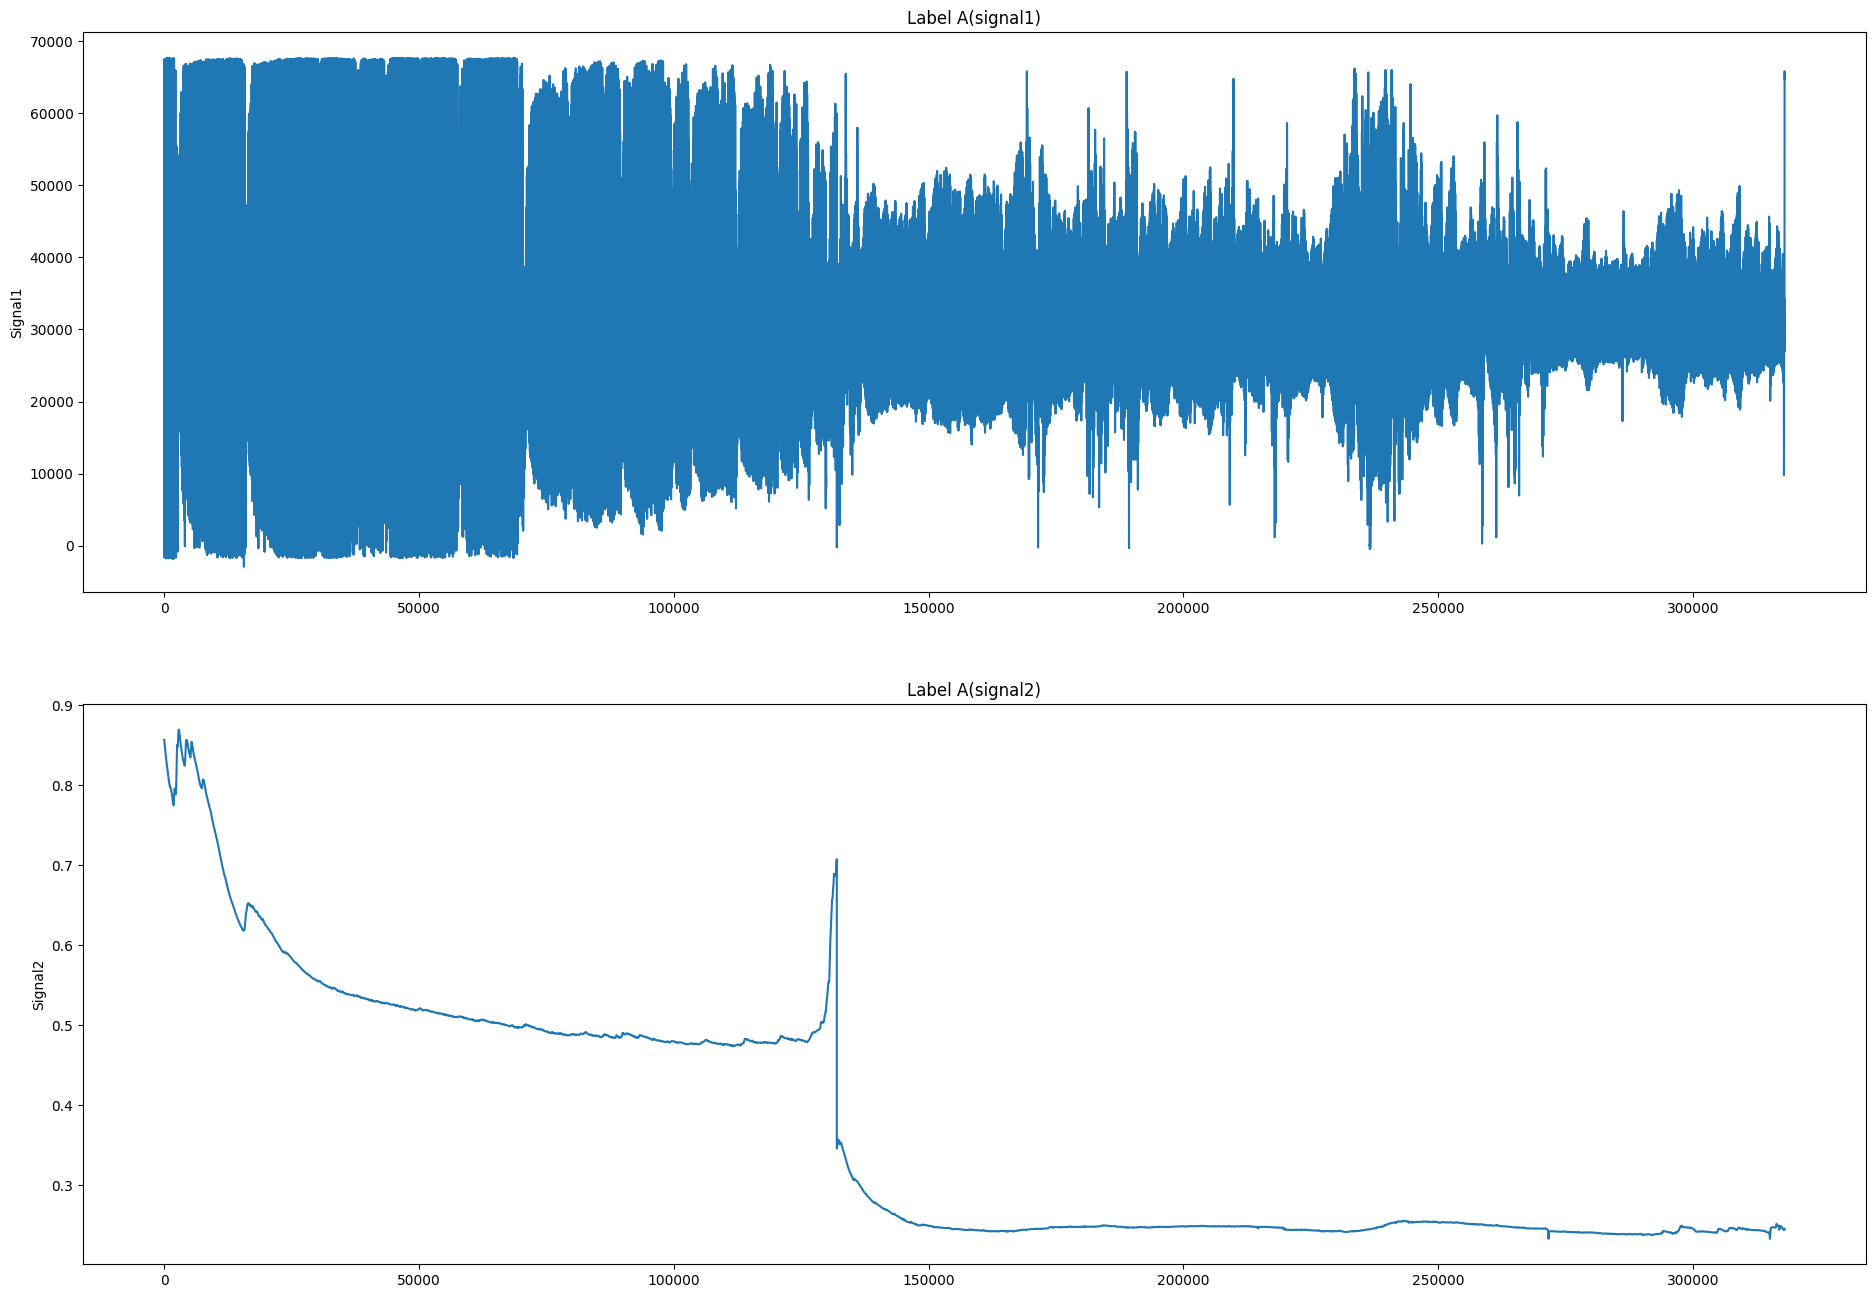

In [15]:
fig, axes=plt.subplots(ncols=1, nrows=2, figsize=(23,16))
sns.lineplot(ax=axes[0], x=np.arange(0, len(data_A), 1), y=data_A['Signal1'])
axes[0].set_title("Label A(signal1)")
sns.lineplot(ax=axes[1], x=np.arange(0, len(data_A), 1), y=data_A['Signal2'])
axes[1].set_title("Label A(signal2)")
plt.show()

Signals associated with Class B

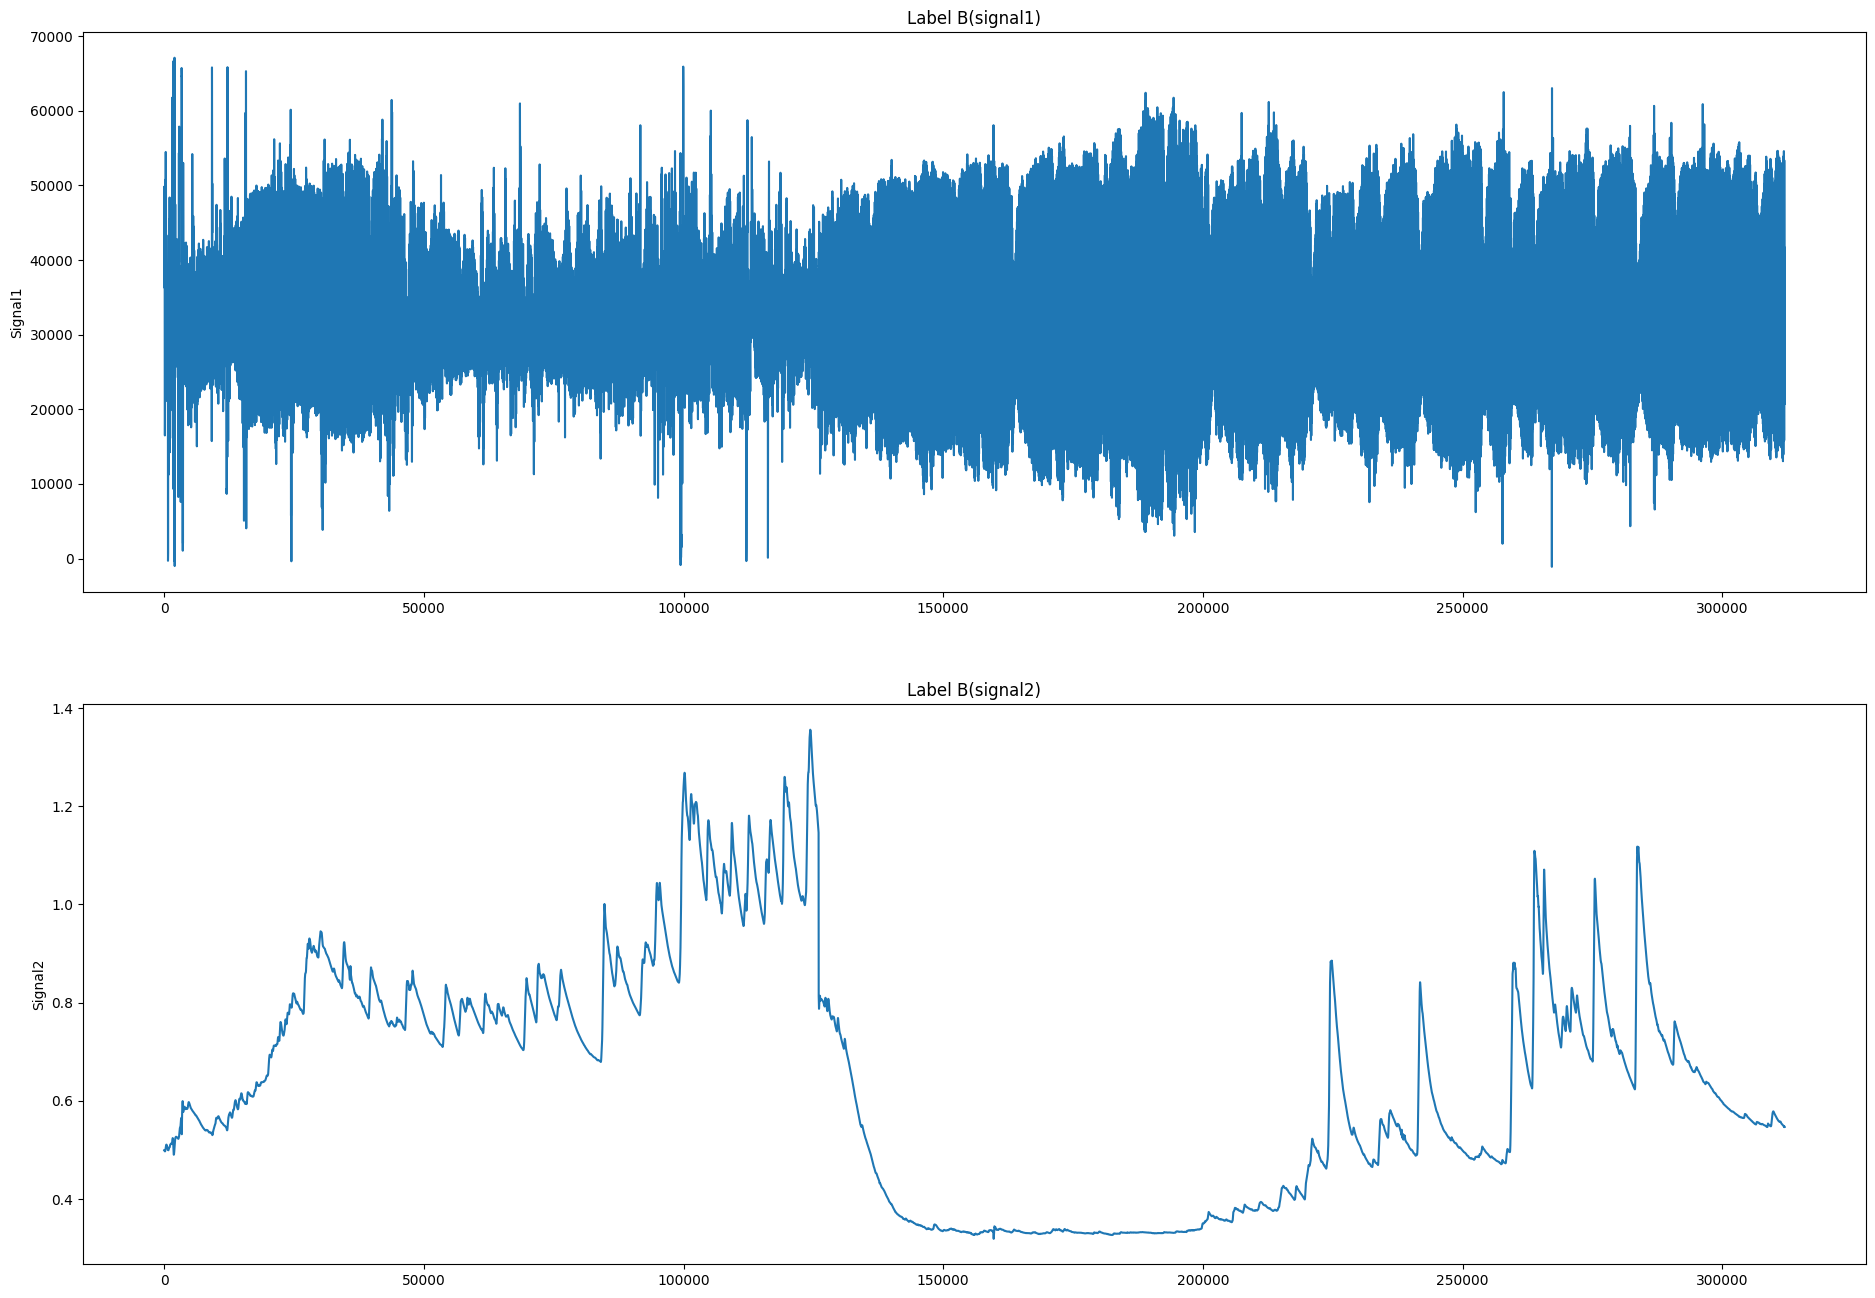

In [16]:
fig, axes=plt.subplots(ncols=1, nrows=2, figsize=(23,16))
sns.lineplot(ax=axes[0], x=np.arange(0, len(data_B), 1), y=data_B['Signal1'])
axes[0].set_title("Label B(signal1)")
sns.lineplot(ax=axes[1], x=np.arange(0, len(data_B), 1), y=data_B['Signal2'])
axes[1].set_title("Label B(signal2)")
plt.show()

Signals associated with Class C

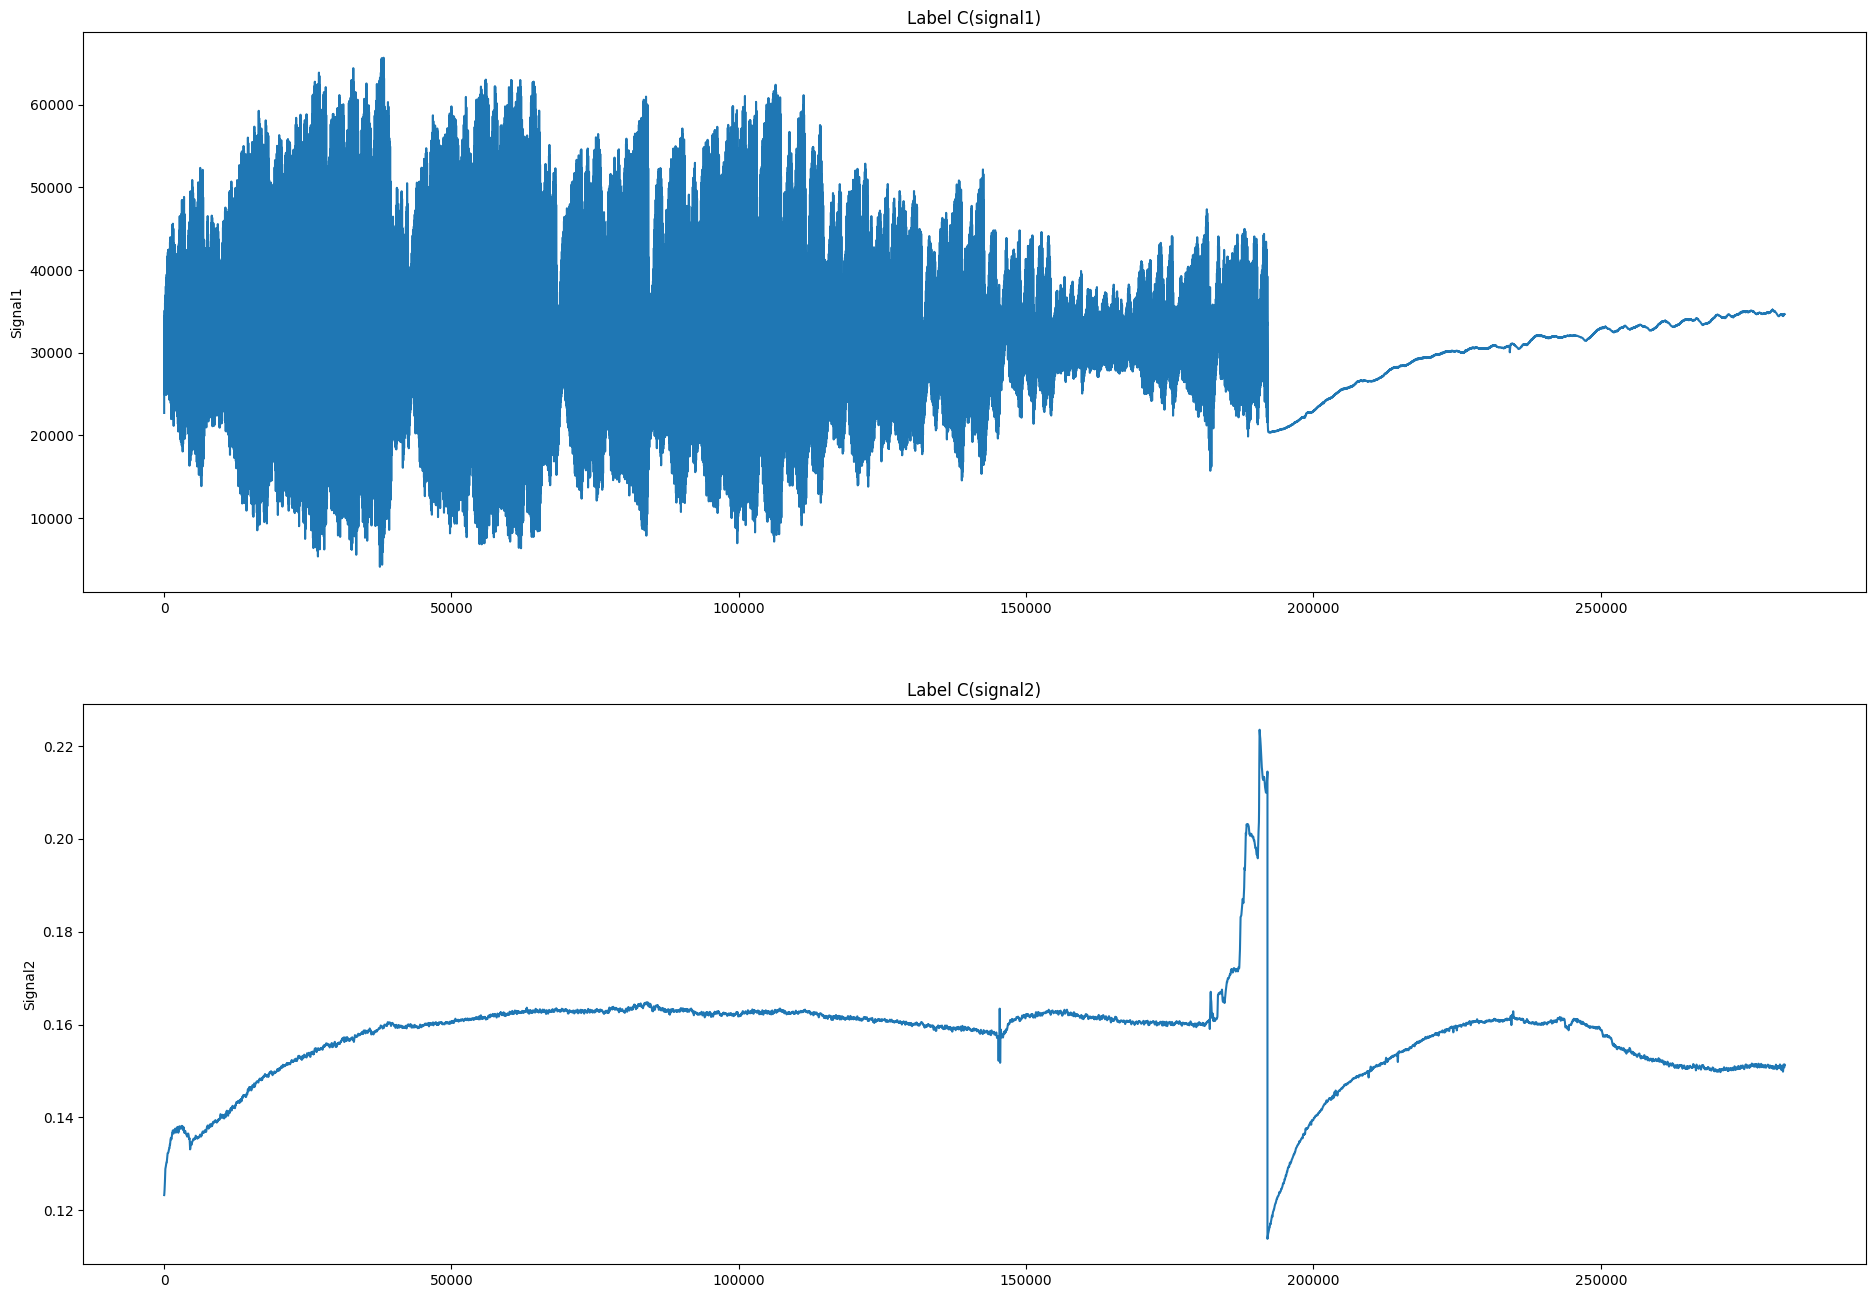

In [17]:
fig, axes=plt.subplots(ncols=1, nrows=2, figsize=(23,16))
sns.lineplot(ax=axes[0], x=np.arange(0, len(data_C), 1), y=data_C['Signal1'])
axes[0].set_title("Label C(signal1)")
sns.lineplot(ax=axes[1], x=np.arange(0, len(data_C), 1), y=data_C['Signal2'])
axes[1].set_title("Label C(signal2)")
plt.show()

# Using Hurst Exponent:

In [18]:
!pip install hurst
from hurst import compute_Hc

Hurst exponents:
For A


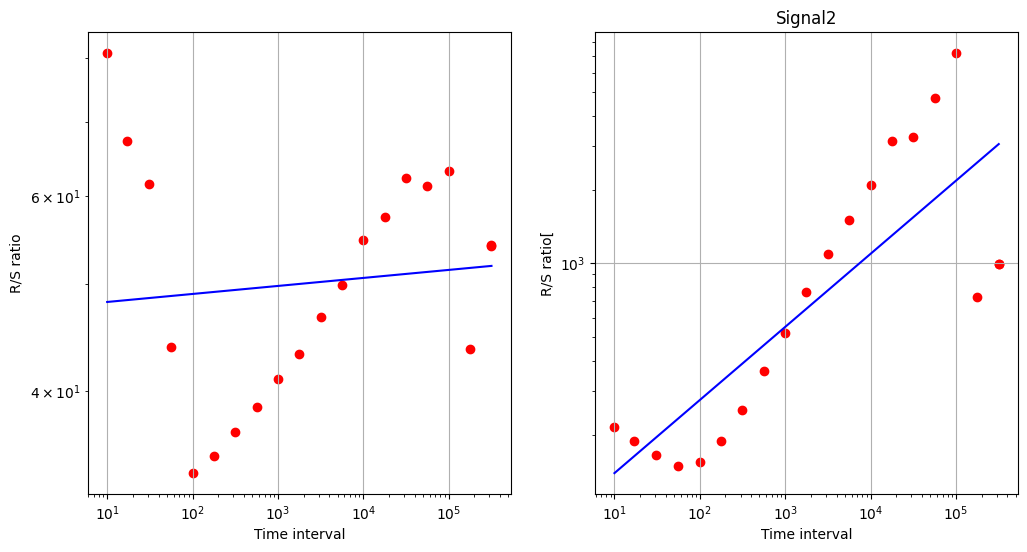

Signal: 0.007246388937073833
signal2: 0.29820429992589276 
Average Exponent: 0.1527253444314833 


For B


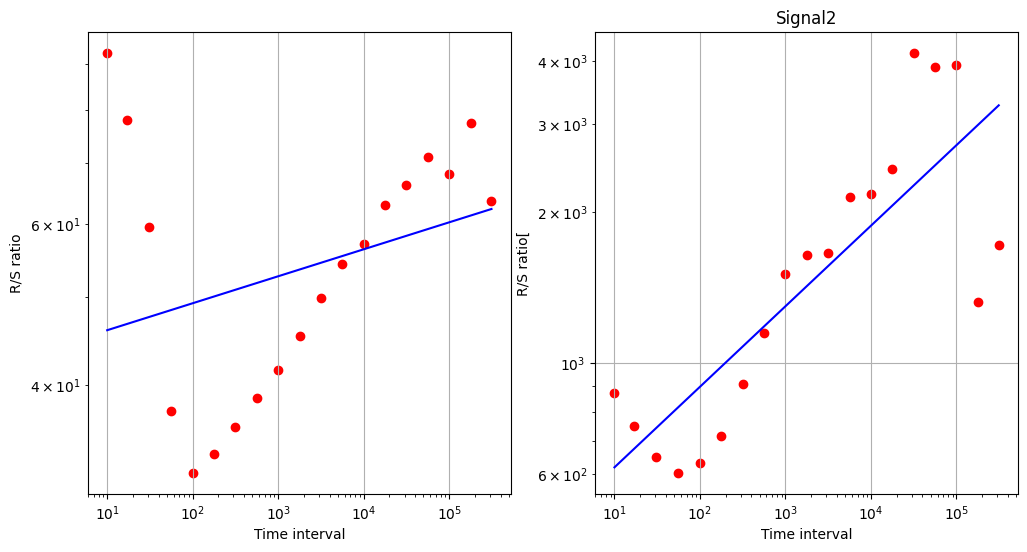

Signal: 0.029550640035149733
signal2: 0.16049657772106007 
Average Exponent: 0.0950236088781049 


For C


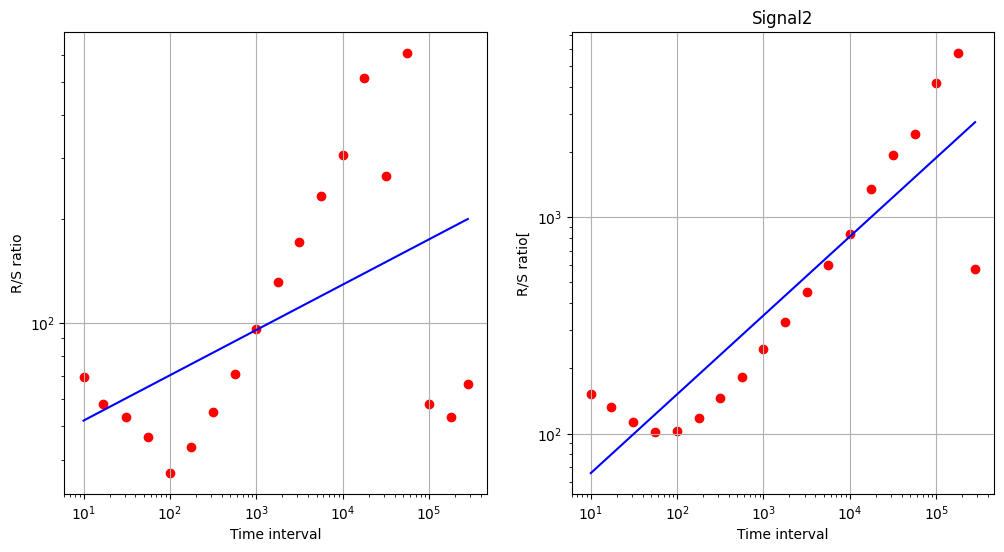

Signal: 0.1315085619581713
signal2: 0.36472637995015333 
Average Exponent: 0.2481174709541623 




In [19]:
print("Hurst exponents:")
for d in data_list.items():
  series1=list(d[1].Signal1)
  series2=list(d[1].Signal2)
  H1, c1, val1=compute_Hc(series1) #calculates the hurst Exponent H1 and H2 for signal1  and signal2
  H2, c2, val2=compute_Hc(series2)

  print("For", d[0])

  fig, axes = plt.subplots(nrows=1 ,ncols= 2,  figsize=(12, 6))
  axes[0].plot(val1[0], c1*val1[0]**H1, color="blue") #plotting the batch size VS the Hurst exponent relation equation
  axes[0].scatter(val1[0], val1[1], color="red")      # the more the deviation, more is the signal complex
  axes[1].set_title("Signal1")
  axes[0].set_xscale('log')
  axes[0].set_yscale('log')
  axes[0].set_xlabel('Time interval')
  axes[0].set_ylabel('R/S ratio')
  axes[0].grid(True)

  axes[1].plot(val2[0], c2*val2[0]**H2, color="blue")
  axes[1].scatter(val2[0], val2[1], color="red")
  axes[1].set_title("Signal2")
  axes[1].set_xscale('log')
  axes[1].set_yscale('log')
  axes[1].set_xlabel('Time interval')
  axes[1].set_ylabel('R/S ratio[')
  axes[1].grid(True)

  plt.show()
  print("Signal:", H1)
  print("signal2:", H2, "\nAverage Exponent:", 0.5*(H1+H2), '\n\n')

**RESULT:** We observe Class B has lowest average Hurst exponent, hence more anti-persistant than other classes. Class B is most complex.
>Complexity: B>A>C

#Detrended Fluctuation Analysis(DFA)

The alpha values of DFA for the labels:

For A 



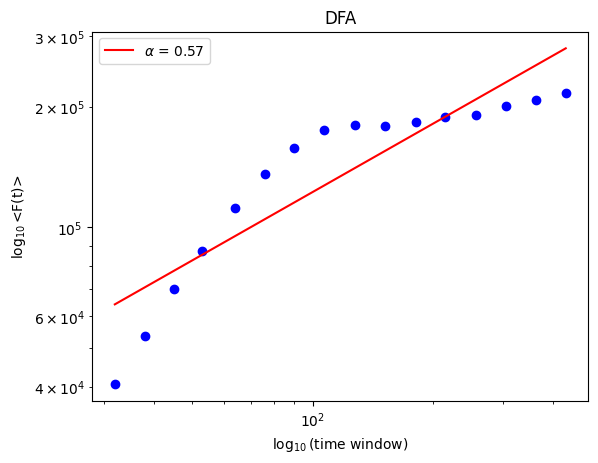

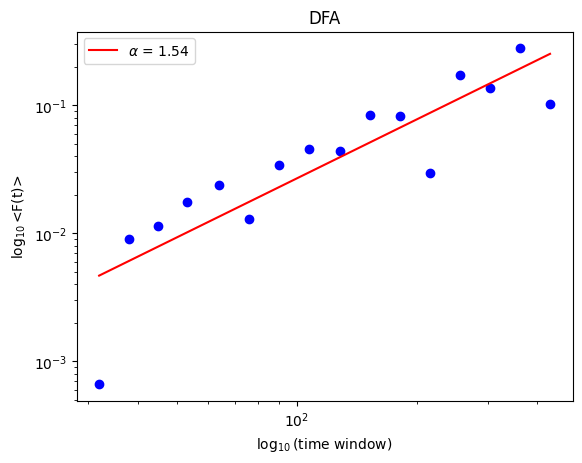

signal1 (alpha): 0.5669822676625105
signal2 (alpha): 1.5350675610513869
Average alpha: 1.0510249143569488

For B 



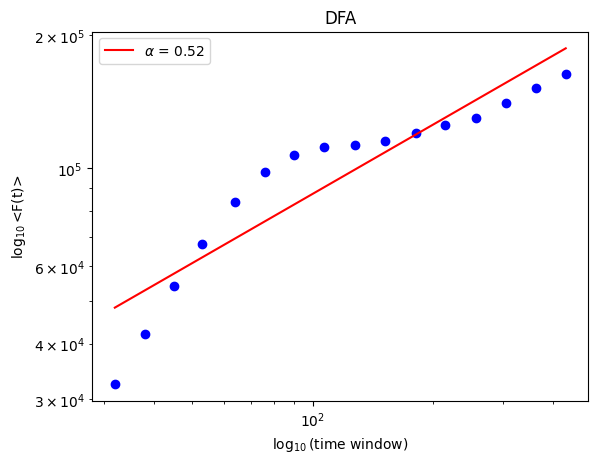

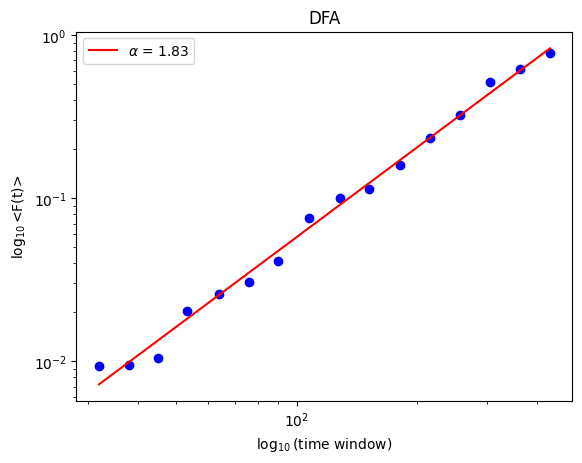

signal1 (alpha): 0.5208740835595755
signal2 (alpha): 1.8267976212461385
Average alpha: 1.1738358524028571

For C 



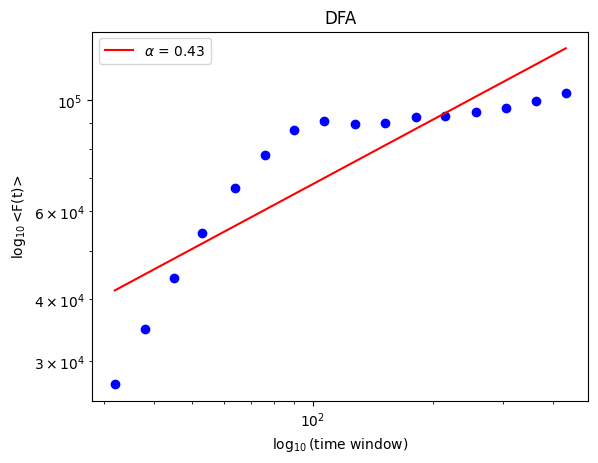

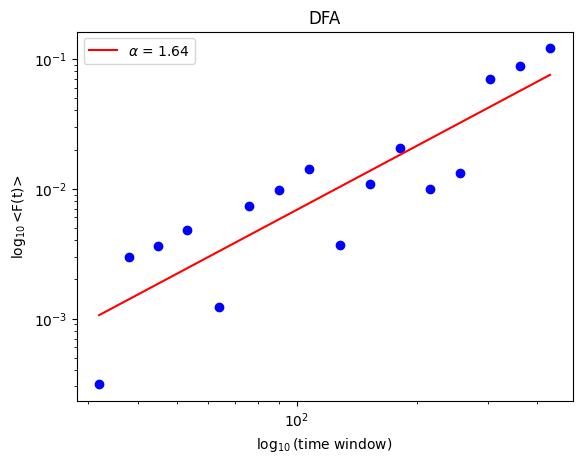

signal1 (alpha): 0.43018283949558456
signal2 (alpha): 1.6400877531797342
Average alpha: 1.0351352963376594



In [23]:

def calc_rms(x, scale):
    shape = (x.shape[0] // scale, scale)
    X = np.lib.stride_tricks.as_strided(x, shape=shape)
    scale_ax = np.arange(scale)
    rms = np.zeros(X.shape[0])
    for e, xcut in enumerate(X):
        coeff = np.polyfit(scale_ax, xcut, 1)
        xfit = np.polyval(coeff, scale_ax)
        rms[e] = np.sqrt(np.mean((xcut - xfit) ** 2))
    return rms

def dfa(x, scale_lim=[5, 9], scale_dens=0.25, show=False):
    y = np.cumsum(x - np.mean(x))
    scales = (2 ** np.arange(scale_lim[0], scale_lim[1], scale_dens)).astype(int)
    fluct = np.zeros(len(scales))
    for e, sc in enumerate(scales):
        fluct[e] = np.sqrt(np.mean(calc_rms(y, sc) ** 2))
    coeff = np.polyfit(np.log2(scales), np.log2(fluct), 1)
    if show:
        fluctfit = 2 ** np.polyval(coeff, np.log2(scales))
        plt.loglog(scales, fluct, 'bo')
        plt.loglog(scales, fluctfit, 'r', label=r'$\alpha$ = %0.2f' % coeff[0])
        plt.title('DFA')
        plt.xlabel(r'$\log_{10}$(time window)')
        plt.ylabel(r'$\log_{10}$<F(t)>')
        plt.legend()
        plt.show()
    return scales, fluct, coeff[0]

data_list = {label: group for label, group in data.groupby('Label')}

print("The alpha values of DFA for the labels:\n")
for label, group in data_list.items():
    print(f"For {label} \n")
    series1 = group['Signal1'].values
    series2 = group['Signal2'].values
    scales1, fluct1, alpha1 = dfa(series1, show=True)
    scales2, fluct2, alpha2 = dfa(series2, show=True)
    print(f"signal1 (alpha): {alpha1}")
    print(f"signal2 (alpha): {alpha2}")
    print(f"Average alpha: {0.5 * (alpha1 + alpha2)}\n")


**RESULT:** We observe that Class C has least average alpha value for DFA. Hence it is most complex.
>Complexity: C>A>B

#Entropy analysis and Higuchi Fractal Dimension

In [24]:
!pip install antropy
#credits github/raphaelvallat/antropy
import antropy as ant

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 888.7 kB/s eta 0:00:00
  Created wheel for antropy: filename=antropy-0.1.6-py3-none-any.whl size=16877 sha256=da4c0f4c0893ef67e51066c64aae5b783befc77c336d3f69110c0452034e15a8
  Stored in directory: /root/.cache/pip/wheels/98/22/06/e91d7bb213c7133d5e2eb34258623e1e19928d5f05e1ee6812
Successfully built antropy


In [25]:
print("Higuchi fractal dimensions and Approx. Entropy")
for d in data_list.items():
  series1=d[1].Signal1.values
  series2=d[1].Signal2.values
  hfd1=ant.higuchi_fd(series1)
  hfd2=ant.higuchi_fd(series2)
  apen1=ant.app_entropy(series1)
  apen2=ant.app_entropy(series2)
  print("For", d[0], '\nhiguchi FD(signal1):', hfd1)
  print("Approximate entropy(signal1):", apen1)
  print("higuchi FD(signal2): ", hfd2)
  print("Approximate entropy(signal2):", apen2)
  print("Average Higuchi FD=", 0.5*(hfd1+hfd2), " Average Approx. Entropy=", 0.5*(apen1+apen2), '\n\n')

Higuchi fractal dimensions and Approx. Entropy
For A 
higuchi FD(signal1): 1.014154676870725
Approximate entropy(signal1): 0.28566703287662687
higuchi FD(signal2):  1.0017484528565648
Approximate entropy(signal2): 0.00011288918481411336
Average Higuchi FD= 1.007951564863645  Average Approx. Entropy= 0.1428899610307205 


For B 
higuchi FD(signal1): 1.021152796942715
Approximate entropy(signal1): 0.34839418110953524
higuchi FD(signal2):  1.0002463145714708
Approximate entropy(signal2): 0.0008917483339825338
Average Higuchi FD= 1.010699555757093  Average Approx. Entropy= 0.1746429647217589 


For C 
higuchi FD(signal1): 1.0237723440189037
Approximate entropy(signal1): 0.27430878278423476
higuchi FD(signal2):  1.003271681124737
Approximate entropy(signal2): 0.0014159765394878843
Average Higuchi FD= 1.0135220125718205  Average Approx. Entropy= 0.13786237966186132 




**RESULT:** We observe by higuchi FD, Class C has most average value and by Approx Entropy, Class B has highest Average value, hence more irregularity and more complex it is to predict.

>Complexity(hfd): C>B>A

>Complexity(Approx. Ent): B>A>C

# All Results together:

**RESULT(HE):** We observe Class B has lowest average Hurst exponent, hence more anti-persistant than other classes. Class B is most complex.
>Complexity: B>A>C


---



**RESULT(DFA):** We observe that Class C has least average alpha value for DFA. Hence it is most complex.
>Complexity: C>A>B


---



**RESULT(Entropy and HFD):** We observe by higuchi FD, Class C has most average value and by Approx Entropy, Class B has highest Average value, hence more irregularity and more complex it is to predict.

>Complexity(hfd): C>B>A

>Complexity(Approx. Ent): B>A>C


---

**FINAL CONCLUSION:** As we can see both Hurst Exponent and Approximate Entropy analysis gives same result, so we go with Hurst Exponent above all to draw a full and final conclusion on class Complexities. We also have visual representation in case of Hurst Exponent analysis(which defines the long-term correlation among the data points with time) and Approx. Entropy defines irregularity in time series.

Hence, final results:

Complexity order:  **B>A>C**;
where '>' defines greater than sign.


---


